In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [7]:
tickers = ['TSLA', 'BND', 'SPY']
data = yf.download(tickers, start='2015-01-01', end='2023-10-05')['Close']
# data = yf.download(tickers, start='2015-01-01', end='2023-10-05')['Adj Close']
data.dropna(inplace=True)  # Handle missing values

[*********************100%***********************]  3 of 3 completed


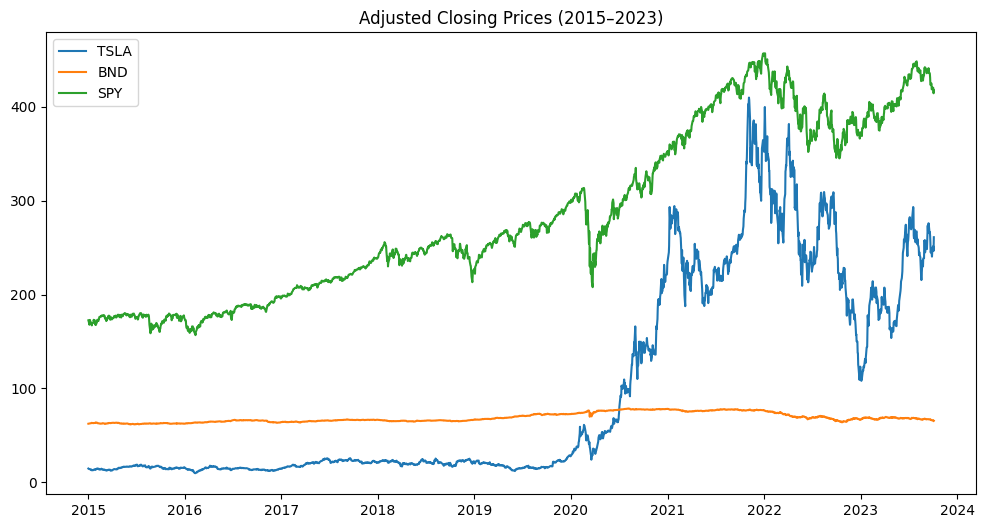

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title('Adjusted Closing Prices (2015–2023)')
plt.legend()
plt.show()

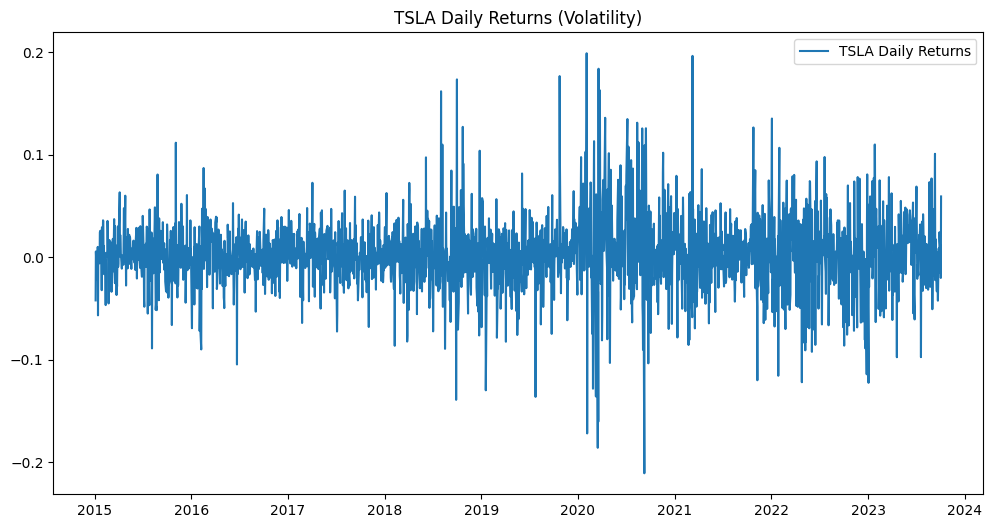

In [9]:
returns = data.pct_change().dropna()
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns['TSLA'], label='TSLA Daily Returns')
plt.title('TSLA Daily Returns (Volatility)')
plt.legend()
plt.show()

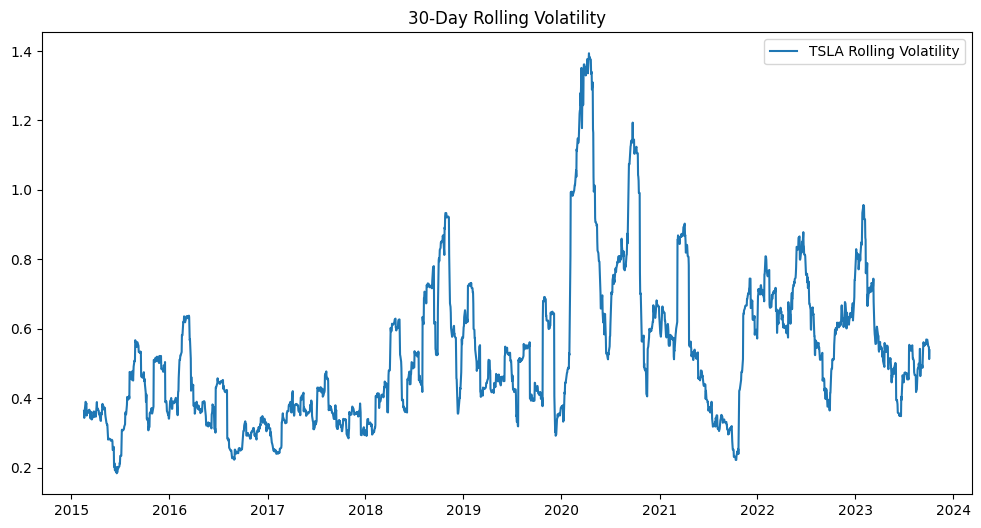

In [12]:
rolling_vol = returns['TSLA'].rolling(30).std() * np.sqrt(252)
plt.figure(figsize=(12, 6))
plt.plot(rolling_vol.index, rolling_vol, label='TSLA Rolling Volatility')
plt.title('30-Day Rolling Volatility')
plt.legend()
plt.show()

In [13]:
# TSLA Outliers
tsla_returns = returns['TSLA']
z_scores = (tsla_returns - tsla_returns.mean()) / tsla_returns.std()
outliers = tsla_returns[abs(z_scores) > 3]
outliers

Date
2015-11-04    0.111735
2018-08-02    0.161880
2018-08-07    0.109886
2018-09-28   -0.139015
2018-10-01    0.173471
2018-10-23    0.127189
2019-01-18   -0.129711
2019-07-25   -0.136137
2019-10-24    0.176692
2020-02-03    0.198949
2020-02-04    0.137256
2020-02-05   -0.171758
2020-02-27   -0.128146
2020-03-02    0.113220
2020-03-09   -0.135725
2020-03-12   -0.116172
2020-03-16   -0.185778
2020-03-18   -0.160344
2020-03-19    0.183877
2020-03-24    0.162817
2020-04-13    0.136038
2020-07-06    0.134794
2020-08-12    0.131236
2020-08-17    0.112031
2020-08-31    0.125689
2020-09-08   -0.210628
2020-09-09    0.109233
2020-09-14    0.125832
2021-03-09    0.196412
2021-10-25    0.126616
2021-11-09   -0.119903
2022-01-03    0.135317
2022-01-27   -0.115542
2022-04-26   -0.121841
2022-12-27   -0.114089
2023-01-03   -0.122422
2023-01-26    0.109673
2023-01-27    0.110002
Name: TSLA, dtype: float64

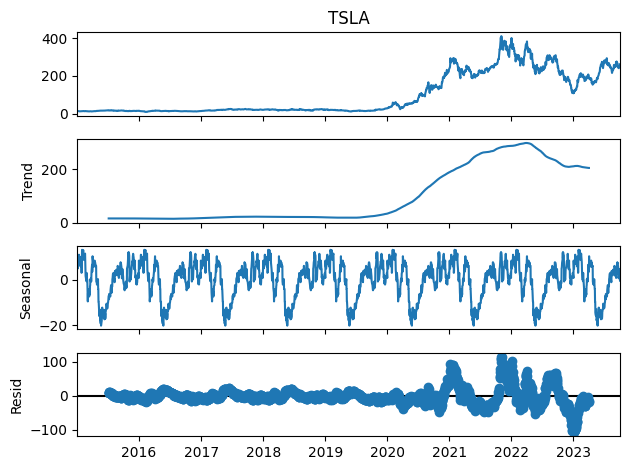

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['TSLA'], period=252)
decomposition.plot()
plt.show()

In [15]:
# TSLA 95% VaR
var_95 = np.percentile(tsla_returns.dropna(), 5)
var_95 * 100

-5.153895375376061

In [16]:
# TSLA Sharpe Ratio
sharpe_ratio = tsla_returns.mean() / tsla_returns.std() * np.sqrt(252)
sharpe_ratio

0.8646706762151918